In [1]:
import os
import sys
import shutil
import csv

if 'SUMO_HOME' in os.environ:
    sys.path.append(os.path.join(os.environ['SUMO_HOME'], 'tools'))
import matplotlib.pyplot as plt
import pandas as pd
import traci

sys.path.append(os.path.abspath("../src"))
from sim import sumo_helper
from sim import sumo_simulation

FOLDER_NAME = "../src/sumo_map/Town01" # Path to SUMO map folder
mapname = FOLDER_NAME.split('/')[-1] # Name of the map

In [2]:
delta_time = 0.1 # This delta time has to be the same as the one used in CARLA
end_time = 0 # 0 means no end time, the simulation will run until all vehicles finish their route

## Fixed Parameters

In [3]:
# ignore the first line (header) and read the rest as dictionaries
with open(f"{FOLDER_NAME}/id_to_vtype_fixed.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    id_styles = {row['id']: row['style'] for row in reader}
    
id_styles
routine_ids = list(id_styles.keys())
veh_style_per_student = list(id_styles.values())
routine_ids

['veh_0_normal', 'veh_0_aggressive']

### Fixed Parameters (no traffic)

In [6]:
output_data_path = f"../data/synthetic/{mapname}/sumo/fixed/no_traffic"
experiment2_file = 'finaltrips_fixed.rou.xml' # The file that contains the routes for the experiment

if os.path.exists(output_data_path):
    shutil.rmtree(output_data_path)
os.makedirs(output_data_path, exist_ok=True)

sumo_helper.add_xml_child(f'{FOLDER_NAME}/osm.sumocfg', 'input', 'route-files', f'{experiment2_file}', replace=True)

Child <route-files> already exists. Updating value to 'finaltrips_fixed.rou.xml'.
XML file updated and formatted successfully.


True

In [ ]:
veh_variables, runtime = sumo_simulation.get_all_variables(FOLDER_NAME, routine_ids, delta_time=delta_time, end_hours=end_time, use_gui=False, convert_geo=False, freeze_traffic_lights=True) # Running the simulation
sumo_simulation.save_data(veh_variables, output_data_path, delta_time, runtime, new_dir=True, verify=True, use_lat_lon=False)

 Retrying in 1 seconds
Child <step-length> with value '0.1' already exists. Skipping addition.
Child <end> with value '' already exists. Skipping addition.
Vehicle veh_0_normal has departed
Vehicle veh_0_aggressive has departed
Step #958.20 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 2 ACT 0 BUF 0)                     tep #450.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 2 ACT 2 BUF 0)                     
Data saved in ../data/synthetic/Town01/sumo/fixed/no_traffic with delta time 0.1 seconds.
Metadata saved in ../data/synthetic/Town01/sumo/fixed/no_traffic/metadata.csv


### Fixed Parameters (traffic)

In [4]:
output_data_path = f"../data/synthetic/{mapname}/sumo/fixed/traffic"
experiment2_file = 'merged_fixed.rou.xml' # The file that contains the routes for the experiment

if os.path.exists(output_data_path):
    shutil.rmtree(output_data_path)
os.makedirs(output_data_path, exist_ok=True)

sumo_helper.add_xml_child(f'{FOLDER_NAME}/osm.sumocfg', 'input', 'route-files', f'{experiment2_file}', replace=True)

Child <route-files> already exists. Updating value to 'merged_fixed.rou.xml'.
XML file updated and formatted successfully.


True

In [5]:
try:
    veh_variables = sumo_simulation.get_all_variables(FOLDER_NAME, routine_ids, delta_time=delta_time, end_hours=end_time, use_gui=False, convert_geo=False, freeze_traffic_lights=True) # Running the simulation
    sumo_simulation.save_data(veh_variables, output_data_path, delta_time, new_dir=True, verify=True, use_lat_lon=False)
except traci.TraCIException as e:
    traci.close()
    print(f"An error occurred: {e}")

 Retrying in 1 seconds
Child <step-length> with value '0.1' already exists. Skipping addition.
Child <end> with value '' already exists. Skipping addition.
Vehicle veh_0_normal has departed
Vehicle veh_0_aggressive has departed


Step #2099.30 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 202 ACT 0 BUF 0)                  tep #1280.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 131 ACT 4 BUF 0)                  ep #1730.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 176 ACT 6 BUF 0)                  
Data saved in ../data/synthetic/Town01/sumo/fixed/traffic with delta time 0.1 seconds.
Metadata saved in ../data/synthetic/Town01/sumo/fixed/traffic/metadata.csv


## LLM Parameters

In [6]:
# ignore the first line (header) and read the rest as dictionaries
with open(f"{FOLDER_NAME}/id_to_vtype_llm.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    id_styles = {row['id']: row['style'] for row in reader}
    
id_styles
routine_ids = list(id_styles.keys())
veh_style_per_student = list(id_styles.values())
routine_ids

['veh_0_aggressive', 'veh_0_normal']

### LLM Parameters (no traffic)

In [12]:
output_data_path = f"../data/synthetic/{mapname}/sumo/llm/no_traffic"
experiment2_file = 'finaltrips_llm.rou.xml' # The file that contains the routes for the experiment

if os.path.exists(output_data_path):
    shutil.rmtree(output_data_path)
os.makedirs(output_data_path, exist_ok=True)

sumo_helper.add_xml_child(f'{FOLDER_NAME}/osm.sumocfg', 'input', 'route-files', f'{experiment2_file}', replace=True)

Child <route-files> already exists. Updating value to 'finaltrips_llm.rou.xml'.
XML file updated and formatted successfully.


True

In [13]:
try:
    veh_variables = sumo_simulation.get_all_variables(FOLDER_NAME, routine_ids, delta_time=delta_time, end_hours=end_time, use_gui=False, convert_geo=False, freeze_traffic_lights=True) # Running the simulation
    sumo_simulation.save_data(veh_variables, output_data_path, delta_time, new_dir=True, verify=True, use_lat_lon=False)
except traci.TraCIException as e:
    traci.close()
    print(f"An error occurred: {e}")

 Retrying in 1 seconds
Child <step-length> with value '0.1' already exists. Skipping addition.
Child <end> with value '' already exists. Skipping addition.
Vehicle veh_0_aggressive has departed


Step #1036.60 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 1 ACT 0 BUF 0)                    
Data saved in ../data/synthetic/Town01/sumo/llm/no_traffic with delta time 0.1 seconds.
Metadata saved in ../data/synthetic/Town01/sumo/llm/no_traffic/metadata.csv


### LLM Parameters (traffic)

In [7]:
output_data_path = f"../data/synthetic/{mapname}/sumo/llm/traffic"
experiment2_file = 'merged_llm.rou.xml' # The file that contains the routes for the experiment

if os.path.exists(output_data_path):
    shutil.rmtree(output_data_path)
os.makedirs(output_data_path, exist_ok=True)

sumo_helper.add_xml_child(f'{FOLDER_NAME}/osm.sumocfg', 'input', 'route-files', f'{experiment2_file}', replace=True)

Child <route-files> already exists. Updating value to 'merged_llm.rou.xml'.
XML file updated and formatted successfully.


True

In [8]:
try:
    veh_variables = sumo_simulation.get_all_variables(FOLDER_NAME, routine_ids, delta_time=delta_time, end_hours=end_time, use_gui=False, convert_geo=False, freeze_traffic_lights=True) # Running the simulation
    sumo_simulation.save_data(veh_variables, output_data_path, delta_time, new_dir=True, verify=True, use_lat_lon=False)
except traci.TraCIException as e:
    traci.close()
    print(f"An error occurred: {e}")

 Retrying in 1 seconds
Child <step-length> with value '0.1' already exists. Skipping addition.
Child <end> with value '' already exists. Skipping addition.
Vehicle veh_0_aggressive has departed
Vehicle veh_0_normal has departed


Step #2099.60 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 202 ACT 0 BUF 0)                  tep #1670.00 (1ms ~= 100.00*RT, ~4000.00UPS, TraCI: 1ms, vehicles TOT 170 ACT 4 BUF 0)   
Data saved in ../data/synthetic/Town01/sumo/llm/traffic with delta time 0.1 seconds.
Metadata saved in ../data/synthetic/Town01/sumo/llm/traffic/metadata.csv


## Plots and Visualization

In [17]:
def plot_df(df, title, output_path):
    fig, axs = plt.subplots(1, 3, figsize=(25, 5))

    time_str = 'Time(s)'
    # Plot acc_x
    axs[0].plot(df['timestamp'], df['acc_x'], label='acc_x')
    axs[0].set_title('Acceleration X over Time')
    axs[0].set_xlabel(time_str)
    axs[0].set_ylabel('acc_x (m/s²)')
    axs[0].legend()
    axs[0].grid(True)

    # Plot acc_y
    axs[1].plot(df['timestamp'], df['acc_y'], label='acc_y', color='orange')
    axs[1].set_title('Acceleration Y over Time')
    axs[1].set_xlabel(time_str)
    axs[1].set_ylabel('acc_y (m/s²)')
    axs[1].legend()
    axs[1].grid(True)
    
    # Plot x_pos vs y_pos, colored by time
    sc = axs[2].scatter(df['x_pos'], df['y_pos'], c=df['timestamp'], cmap='viridis', label='Trajectory')
    axs[2].set_title('Trajectory: x_pos vs y_pos (colored by time)')
    axs[2].set_xlabel('x_pos')
    axs[2].set_ylabel('y_pos')
    axs[2].grid(True)
    cbar = plt.colorbar(sc, ax=axs[2])
    cbar.set_label(time_str)

    plt.suptitle(title)
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
        print(f"Figure saved to {output_path}")

    plt.show()

Figure saved to ../results/figures/sumo/Town01/aggressive_fixed.png


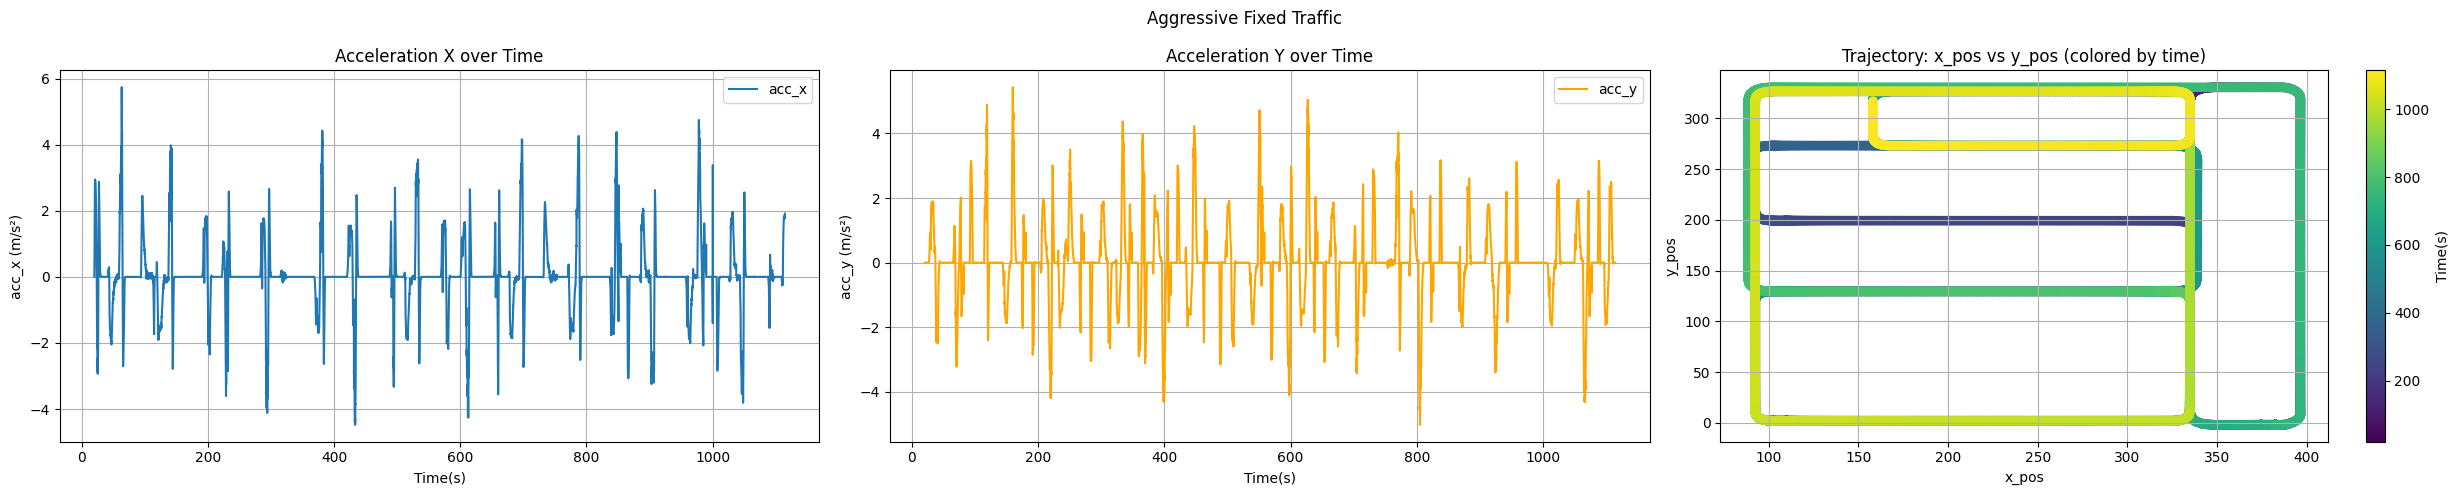

Figure saved to ../results/figures/sumo/Town01/aggressive_llm.png


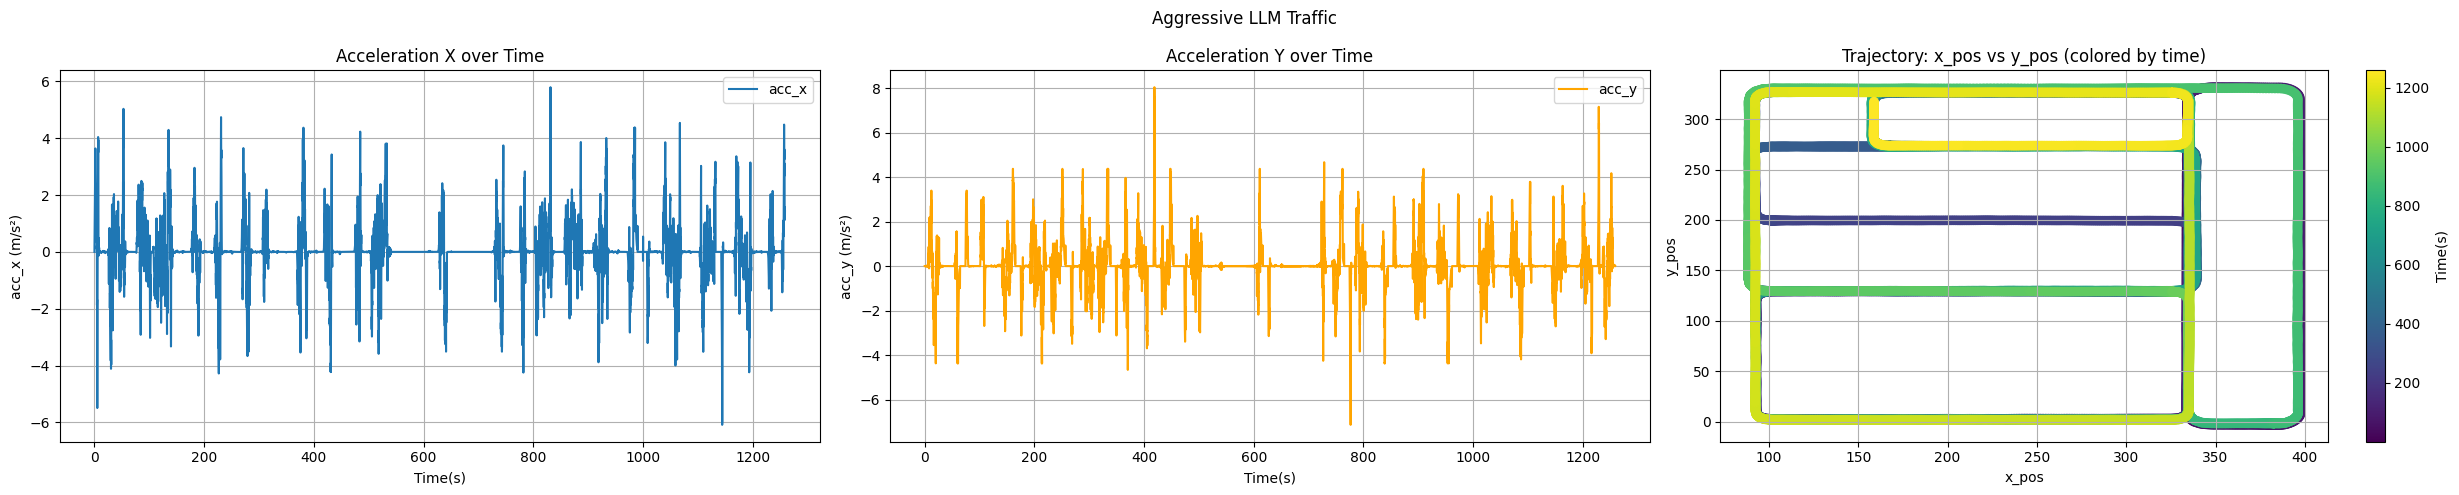

Figure saved to ../results/figures/sumo/Town01/normal_fixed.png


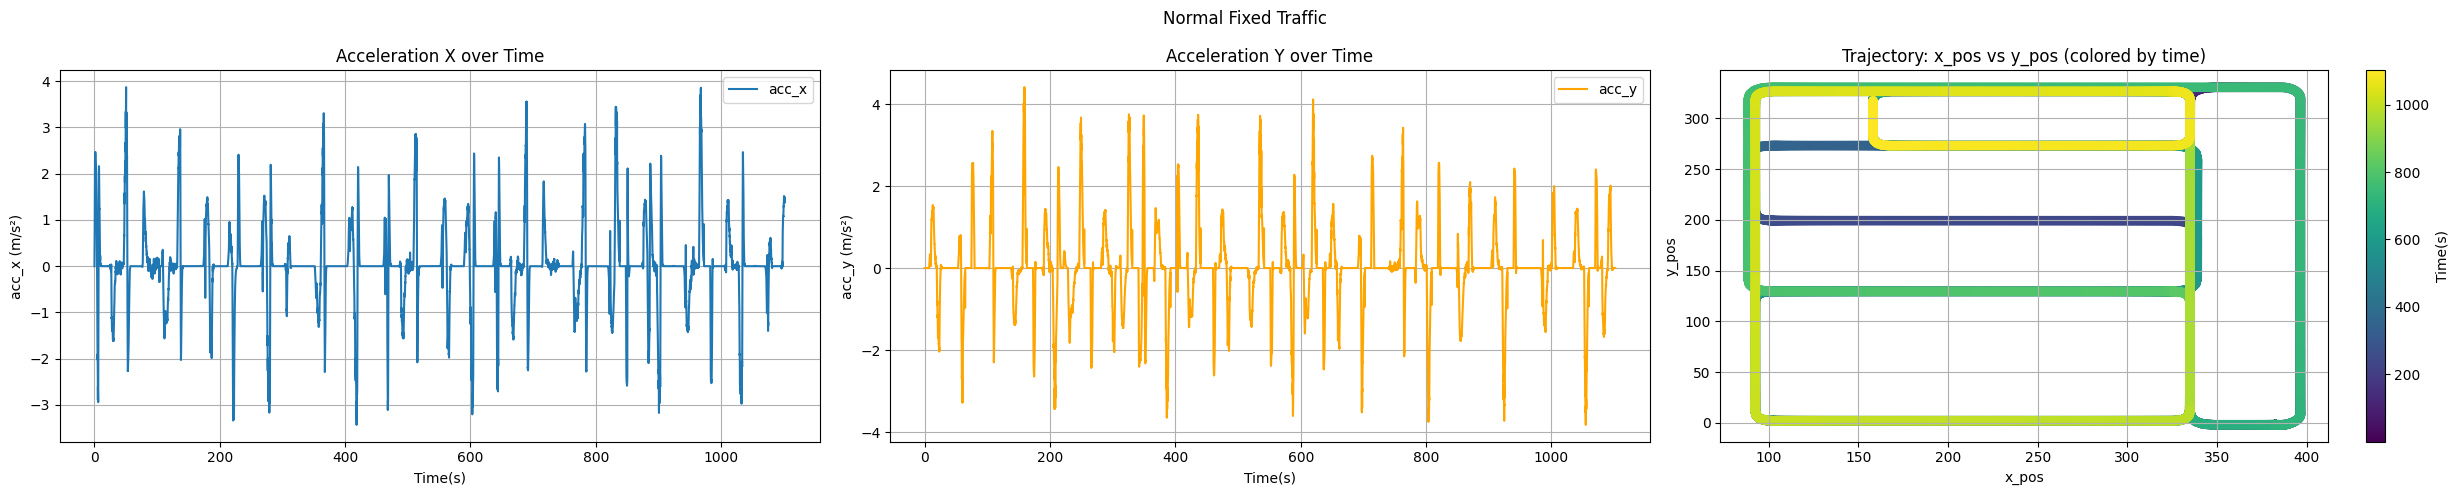

Figure saved to ../results/figures/sumo/Town01/normal_llm.png


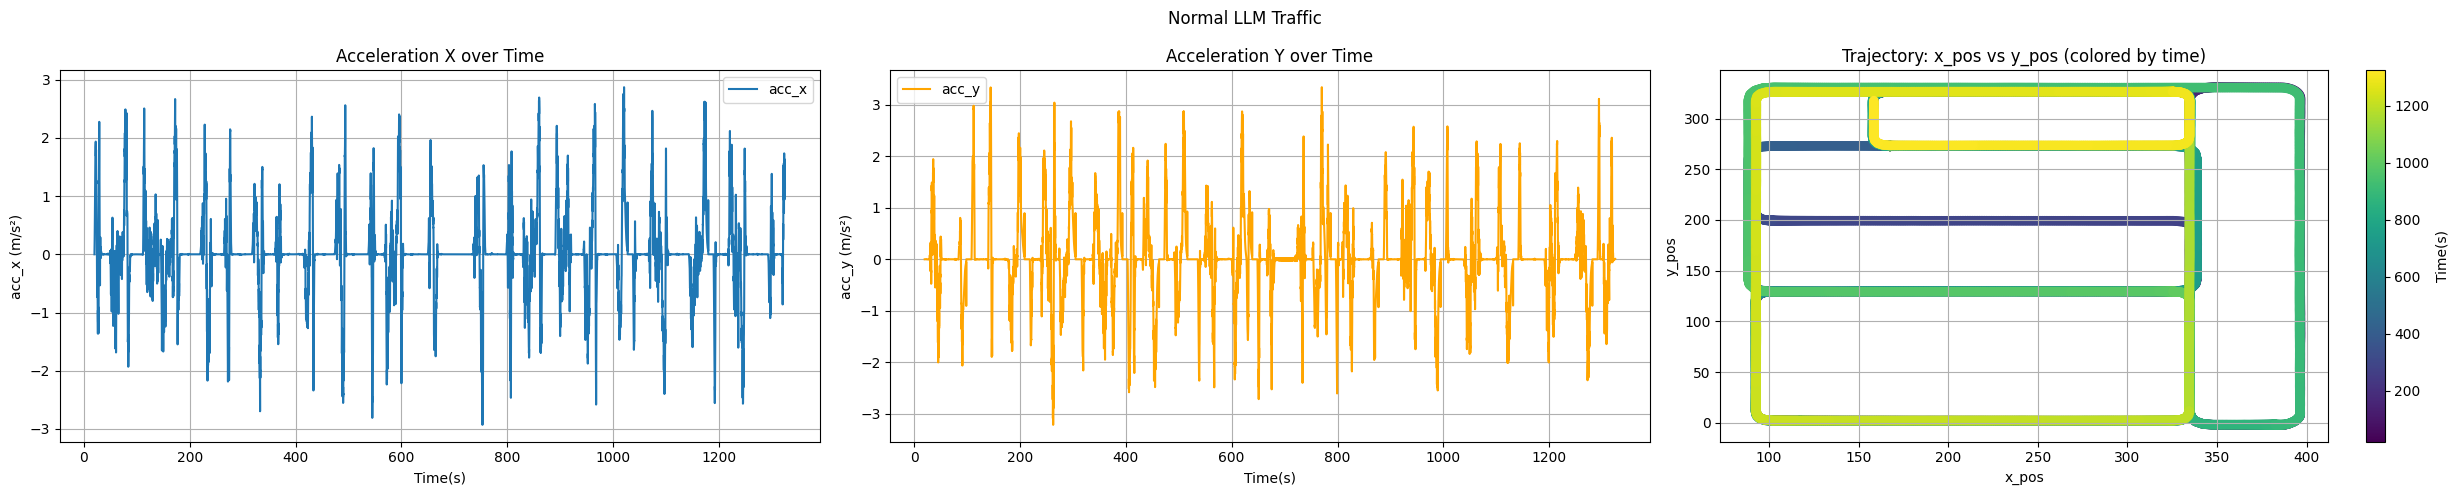

In [18]:
data_path = f"../data/synthetic/{mapname}/sumo"
df_aggressive_fixed_traffic = pd.read_csv(f"{data_path}/fixed/traffic/veh_0_aggressive.csv")
df_aggressive_llm_traffic = pd.read_csv(f"{data_path}/llm/traffic/veh_0_aggressive.csv")
df_normal_fixed_traffic = pd.read_csv(f"{data_path}/fixed/traffic/veh_0_normal.csv")
df_normal_llm_traffic = pd.read_csv(f"{data_path}/llm/traffic/veh_0_normal.csv")

figs_path = f"../results/figures/sumo/{mapname}"
plot_df(df_aggressive_fixed_traffic, title="Aggressive Fixed Traffic", output_path=f"{figs_path}/aggressive_fixed.png")
plot_df(df_aggressive_llm_traffic, title="Aggressive LLM Traffic", output_path=f"{figs_path}/aggressive_llm.png")
plot_df(df_normal_fixed_traffic, title="Normal Fixed Traffic", output_path=f"{figs_path}/normal_fixed.png")
plot_df(df_normal_llm_traffic, title="Normal LLM Traffic", output_path=f"{figs_path}/normal_llm.png")